# Building a multi-layer perceptron for cancer classification

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
# Import Cancer dataset from the Sklearn library

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [43]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [44]:
# All rows from first and second column

X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [45]:
# All rows from column named 'target'

y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

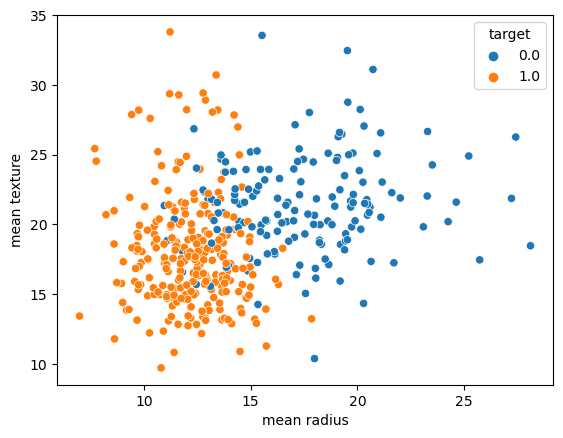

In [46]:
# Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [47]:
# Perform feature scaling on training and test sets

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

<AxesSubplot:>

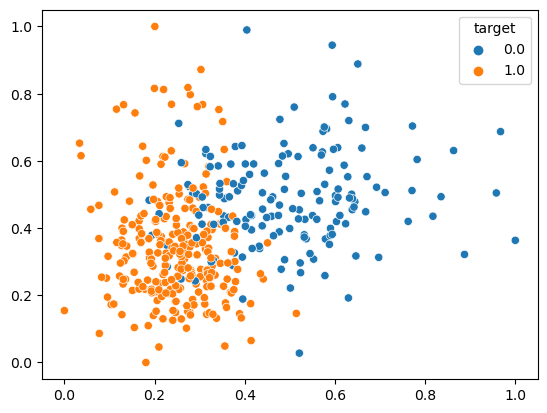

In [48]:
sns.scatterplot(x = X_train_scaled[:,0], y = X_train_scaled[:,1], hue=y_train)

In [50]:
# Deine and fit the final model

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
14/14 - 0s - loss: 0.6630 - 244ms/epoch - 17ms/step
Epoch 2/500
14/14 - 0s - loss: 0.6610 - 10ms/epoch - 714us/step
Epoch 3/500
14/14 - 0s - loss: 0.6592 - 9ms/epoch - 629us/step
Epoch 4/500
14/14 - 0s - loss: 0.6575 - 10ms/epoch - 714us/step
Epoch 5/500
14/14 - 0s - loss: 0.6558 - 10ms/epoch - 714us/step
Epoch 6/500
14/14 - 0s - loss: 0.6543 - 10ms/epoch - 714us/step
Epoch 7/500
14/14 - 0s - loss: 0.6528 - 9ms/epoch - 643us/step
Epoch 8/500
14/14 - 0s - loss: 0.6513 - 9ms/epoch - 642us/step
Epoch 9/500
14/14 - 0s - loss: 0.6499 - 9ms/epoch - 643us/step
Epoch 10/500
14/14 - 0s - loss: 0.6485 - 9ms/epoch - 643us/step
Epoch 11/500
14/14 - 0s - loss: 0.6472 - 10ms/epoch - 714us/step
Epoch 12/500
14/14 - 0s - loss: 0.6459 - 10ms/epoch - 684us/step
Epoch 13/500
14/14 - 0s - loss: 0.6445 - 9ms/epoch - 643us/step
Epoch 14/500
14/14 - 0s - loss: 0.6432 - 10ms/epoch - 715us/step
Epoch 15/500
14/14 - 0s - loss: 0.6420 - 11ms/epoch - 763us/step
Epoch 16/500
14/14 - 0s - loss: 0.6409 -

14/14 - 0s - loss: 0.5581 - 8ms/epoch - 571us/step
Epoch 129/500
14/14 - 0s - loss: 0.5575 - 10ms/epoch - 714us/step
Epoch 130/500
14/14 - 0s - loss: 0.5569 - 9ms/epoch - 613us/step
Epoch 131/500
14/14 - 0s - loss: 0.5563 - 9ms/epoch - 643us/step
Epoch 132/500
14/14 - 0s - loss: 0.5557 - 9ms/epoch - 643us/step
Epoch 133/500
14/14 - 0s - loss: 0.5551 - 9ms/epoch - 643us/step
Epoch 134/500
14/14 - 0s - loss: 0.5545 - 9ms/epoch - 643us/step
Epoch 135/500
14/14 - 0s - loss: 0.5539 - 8ms/epoch - 571us/step
Epoch 136/500
14/14 - 0s - loss: 0.5533 - 9ms/epoch - 643us/step
Epoch 137/500
14/14 - 0s - loss: 0.5527 - 9ms/epoch - 643us/step
Epoch 138/500
14/14 - 0s - loss: 0.5521 - 10ms/epoch - 714us/step
Epoch 139/500
14/14 - 0s - loss: 0.5515 - 9ms/epoch - 643us/step
Epoch 140/500
14/14 - 0s - loss: 0.5509 - 10ms/epoch - 714us/step
Epoch 141/500
14/14 - 0s - loss: 0.5503 - 9ms/epoch - 643us/step
Epoch 142/500
14/14 - 0s - loss: 0.5497 - 10ms/epoch - 714us/step
Epoch 143/500
14/14 - 0s - loss: 0.

Epoch 254/500
14/14 - 0s - loss: 0.4923 - 9ms/epoch - 643us/step
Epoch 255/500
14/14 - 0s - loss: 0.4919 - 8ms/epoch - 607us/step
Epoch 256/500
14/14 - 0s - loss: 0.4915 - 9ms/epoch - 643us/step
Epoch 257/500
14/14 - 0s - loss: 0.4910 - 9ms/epoch - 643us/step
Epoch 258/500
14/14 - 0s - loss: 0.4906 - 9ms/epoch - 643us/step
Epoch 259/500
14/14 - 0s - loss: 0.4902 - 9ms/epoch - 642us/step
Epoch 260/500
14/14 - 0s - loss: 0.4897 - 8ms/epoch - 571us/step
Epoch 261/500
14/14 - 0s - loss: 0.4893 - 10ms/epoch - 714us/step
Epoch 262/500
14/14 - 0s - loss: 0.4889 - 9ms/epoch - 643us/step
Epoch 263/500
14/14 - 0s - loss: 0.4884 - 9ms/epoch - 643us/step
Epoch 264/500
14/14 - 0s - loss: 0.4880 - 10ms/epoch - 714us/step
Epoch 265/500
14/14 - 0s - loss: 0.4876 - 9ms/epoch - 643us/step
Epoch 266/500
14/14 - 0s - loss: 0.4871 - 9ms/epoch - 643us/step
Epoch 267/500
14/14 - 0s - loss: 0.4867 - 8ms/epoch - 571us/step
Epoch 268/500
14/14 - 0s - loss: 0.4863 - 10ms/epoch - 714us/step
Epoch 269/500
14/14 - 

Epoch 380/500
14/14 - 0s - loss: 0.4445 - 10ms/epoch - 714us/step
Epoch 381/500
14/14 - 0s - loss: 0.4442 - 10ms/epoch - 714us/step
Epoch 382/500
14/14 - 0s - loss: 0.4439 - 9ms/epoch - 645us/step
Epoch 383/500
14/14 - 0s - loss: 0.4436 - 10ms/epoch - 714us/step
Epoch 384/500
14/14 - 0s - loss: 0.4433 - 10ms/epoch - 714us/step
Epoch 385/500
14/14 - 0s - loss: 0.4430 - 9ms/epoch - 643us/step
Epoch 386/500
14/14 - 0s - loss: 0.4426 - 9ms/epoch - 643us/step
Epoch 387/500
14/14 - 0s - loss: 0.4423 - 10ms/epoch - 714us/step
Epoch 388/500
14/14 - 0s - loss: 0.4420 - 10ms/epoch - 714us/step
Epoch 389/500
14/14 - 0s - loss: 0.4417 - 9ms/epoch - 643us/step
Epoch 390/500
14/14 - 0s - loss: 0.4414 - 9ms/epoch - 643us/step
Epoch 391/500
14/14 - 0s - loss: 0.4411 - 9ms/epoch - 643us/step
Epoch 392/500
14/14 - 0s - loss: 0.4407 - 9ms/epoch - 643us/step
Epoch 393/500
14/14 - 0s - loss: 0.4404 - 9ms/epoch - 643us/step
Epoch 394/500
14/14 - 0s - loss: 0.4401 - 10ms/epoch - 689us/step
Epoch 395/500
14/1

## Trying more neurons to improve results

In [54]:
# Define and fit the final model

model = Sequential()

# Input layer
model.add(Dense(20, input_dim=2, activation='relu'))
# Hidden layer
model.add(Dense(20, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
14/14 - 0s - loss: 0.6883 - 404ms/epoch - 29ms/step
Epoch 2/500
14/14 - 0s - loss: 0.6792 - 10ms/epoch - 714us/step
Epoch 3/500
14/14 - 0s - loss: 0.6693 - 9ms/epoch - 639us/step
Epoch 4/500
14/14 - 0s - loss: 0.6585 - 10ms/epoch - 736us/step
Epoch 5/500
14/14 - 0s - loss: 0.6466 - 10ms/epoch - 714us/step
Epoch 6/500
14/14 - 0s - loss: 0.6338 - 10ms/epoch - 714us/step
Epoch 7/500
14/14 - 0s - loss: 0.6190 - 11ms/epoch - 777us/step
Epoch 8/500
14/14 - 0s - loss: 0.6023 - 10ms/epoch - 689us/step
Epoch 9/500
14/14 - 0s - loss: 0.5845 - 10ms/epoch - 714us/step
Epoch 10/500
14/14 - 0s - loss: 0.5636 - 8ms/epoch - 574us/step
Epoch 11/500
14/14 - 0s - loss: 0.5426 - 13ms/epoch - 929us/step
Epoch 12/500
14/14 - 0s - loss: 0.5205 - 12ms/epoch - 823us/step
Epoch 13/500
14/14 - 0s - loss: 0.4994 - 11ms/epoch - 786us/step
Epoch 14/500
14/14 - 0s - loss: 0.4773 - 11ms/epoch - 795us/step
Epoch 15/500
14/14 - 0s - loss: 0.4569 - 10ms/epoch - 714us/step
Epoch 16/500
14/14 - 0s - loss: 0.43

14/14 - 0s - loss: 0.2469 - 11ms/epoch - 786us/step
Epoch 128/500
14/14 - 0s - loss: 0.2473 - 10ms/epoch - 714us/step
Epoch 129/500
14/14 - 0s - loss: 0.2463 - 10ms/epoch - 714us/step
Epoch 130/500
14/14 - 0s - loss: 0.2464 - 9ms/epoch - 643us/step
Epoch 131/500
14/14 - 0s - loss: 0.2462 - 10ms/epoch - 714us/step
Epoch 132/500
14/14 - 0s - loss: 0.2469 - 10ms/epoch - 714us/step
Epoch 133/500
14/14 - 0s - loss: 0.2456 - 9ms/epoch - 643us/step
Epoch 134/500
14/14 - 0s - loss: 0.2460 - 9ms/epoch - 643us/step
Epoch 135/500
14/14 - 0s - loss: 0.2456 - 9ms/epoch - 643us/step
Epoch 136/500
14/14 - 0s - loss: 0.2462 - 10ms/epoch - 714us/step
Epoch 137/500
14/14 - 0s - loss: 0.2453 - 8ms/epoch - 571us/step
Epoch 138/500
14/14 - 0s - loss: 0.2463 - 10ms/epoch - 714us/step
Epoch 139/500
14/14 - 0s - loss: 0.2464 - 10ms/epoch - 714us/step
Epoch 140/500
14/14 - 0s - loss: 0.2460 - 10ms/epoch - 714us/step
Epoch 141/500
14/14 - 0s - loss: 0.2448 - 9ms/epoch - 643us/step
Epoch 142/500
14/14 - 0s - los

Epoch 252/500
14/14 - 0s - loss: 0.2394 - 9ms/epoch - 643us/step
Epoch 253/500
14/14 - 0s - loss: 0.2394 - 10ms/epoch - 714us/step
Epoch 254/500
14/14 - 0s - loss: 0.2433 - 10ms/epoch - 714us/step
Epoch 255/500
14/14 - 0s - loss: 0.2409 - 9ms/epoch - 643us/step
Epoch 256/500
14/14 - 0s - loss: 0.2399 - 10ms/epoch - 714us/step
Epoch 257/500
14/14 - 0s - loss: 0.2394 - 10ms/epoch - 714us/step
Epoch 258/500
14/14 - 0s - loss: 0.2399 - 9ms/epoch - 643us/step
Epoch 259/500
14/14 - 0s - loss: 0.2396 - 10ms/epoch - 680us/step
Epoch 260/500
14/14 - 0s - loss: 0.2395 - 10ms/epoch - 688us/step
Epoch 261/500
14/14 - 0s - loss: 0.2406 - 9ms/epoch - 643us/step
Epoch 262/500
14/14 - 0s - loss: 0.2424 - 10ms/epoch - 714us/step
Epoch 263/500
14/14 - 0s - loss: 0.2386 - 10ms/epoch - 746us/step
Epoch 264/500
14/14 - 0s - loss: 0.2403 - 9ms/epoch - 643us/step
Epoch 265/500
14/14 - 0s - loss: 0.2385 - 10ms/epoch - 714us/step
Epoch 266/500
14/14 - 0s - loss: 0.2397 - 9ms/epoch - 643us/step
Epoch 267/500
14

Epoch 377/500
14/14 - 0s - loss: 0.2376 - 11ms/epoch - 786us/step
Epoch 378/500
14/14 - 0s - loss: 0.2378 - 9ms/epoch - 643us/step
Epoch 379/500
14/14 - 0s - loss: 0.2378 - 9ms/epoch - 643us/step
Epoch 380/500
14/14 - 0s - loss: 0.2367 - 11ms/epoch - 750us/step
Epoch 381/500
14/14 - 0s - loss: 0.2387 - 10ms/epoch - 714us/step
Epoch 382/500
14/14 - 0s - loss: 0.2372 - 10ms/epoch - 715us/step
Epoch 383/500
14/14 - 0s - loss: 0.2381 - 10ms/epoch - 714us/step
Epoch 384/500
14/14 - 0s - loss: 0.2366 - 9ms/epoch - 643us/step
Epoch 385/500
14/14 - 0s - loss: 0.2390 - 9ms/epoch - 643us/step
Epoch 386/500
14/14 - 0s - loss: 0.2389 - 10ms/epoch - 714us/step
Epoch 387/500
14/14 - 0s - loss: 0.2368 - 9ms/epoch - 643us/step
Epoch 388/500
14/14 - 0s - loss: 0.2368 - 10ms/epoch - 714us/step
Epoch 389/500
14/14 - 0s - loss: 0.2368 - 10ms/epoch - 714us/step
Epoch 390/500
14/14 - 0s - loss: 0.2369 - 10ms/epoch - 694us/step
Epoch 391/500
14/14 - 0s - loss: 0.2375 - 9ms/epoch - 643us/step
Epoch 392/500
14

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                60        
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Make prediction

y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 [==============================] - 0s 750us/step


<AxesSubplot:>

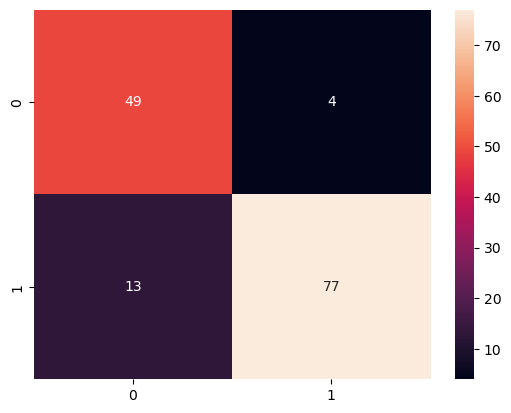

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        53
         1.0       0.95      0.86      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.89      0.88      0.88       143



2813/2813 [==============================] - 2s 531us/step


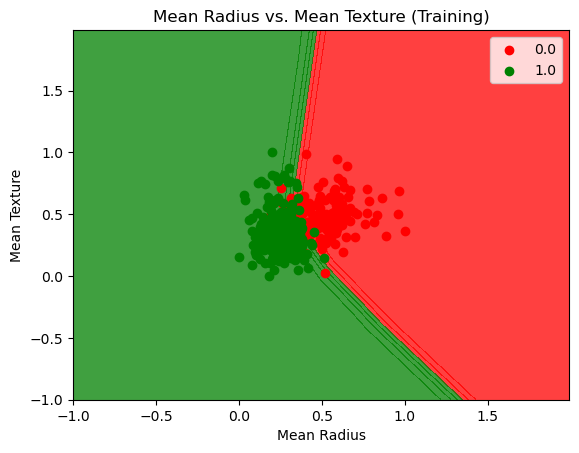

In [72]:
# Visualising the Training dataset results

from matplotlib.colors import ListedColormap

X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [68]:
weights, biases = model.layers[0].get_weights()

In [69]:
weights

array([[ 0.02394803,  0.7809616 ,  0.41158792, -0.21701725,  0.58378845,
        -0.05753343,  0.5849357 ,  0.8484853 , -0.32432786, -0.08742386,
        -0.17213213, -0.4328228 ,  0.9061236 , -0.600475  ,  0.01808922,
         0.8091314 , -0.07409367, -0.01720792, -0.10829148, -0.3376891 ],
       [-0.7374041 ,  0.04534443, -0.62431085,  0.24905998,  0.07789211,
         0.81503695,  0.35332128, -0.0672249 , -0.06385484,  0.01126477,
        -0.00304939, -0.15268254, -0.18332274,  0.24116105, -0.28030083,
        -0.00826798, -0.3692721 , -0.03062612, -0.330109  ,  0.2647435 ]],
      dtype=float32)

In [70]:
biases

array([ 0.36628237, -0.08665174,  0.16246602,  0.27865115, -0.08748967,
        0.37708625, -0.15895624, -0.06797817,  0.        ,  0.23664123,
       -0.00555545,  0.        , -0.00129103,  0.30791232, -0.00664007,
       -0.07982134,  0.        ,  0.        ,  0.        ,  0.1703656 ],
      dtype=float32)

2813/2813 [==============================] - 2s 534us/step


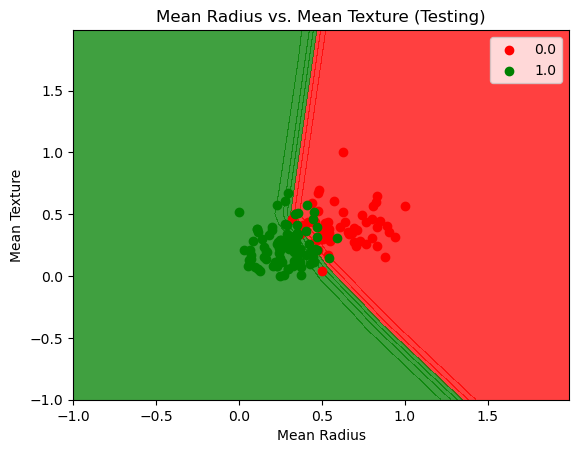

In [73]:
# Visualising the Test dataset results

from matplotlib.colors import ListedColormap

X_grid, y_grid = X_test_scaled, y_test

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()